<a href="https://colab.research.google.com/github/PlaZMaD/ml_miem_2024/blob/main/Seminar_12_Graphical_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Семинар 11. Модели на графах

В этом семинаре мы будем использовать два пакета, [NetworkX](https://networkx.org/documentation/stable/) и [PyTorch Geometric](https://pytorch-geometric.readthedocs.io/en/latest/).

Источники информации: https://colab.research.google.com/github/jdwittenauer/ipython-notebooks/blob/master/notebooks/libraries/NetworkX.ipynb#scrollTo=zA1OO6huHeV6
и курс [Machine Learning with Graphs](http://web.stanford.edu/class/cs224w/).

Введение: https://colab.research.google.com/github/phucnsp/blog/blob/master/_notebooks/2020-05-27-ML-graph-premilinary-part1.ipynb

# Основные концепции

### Структура графов

**Сеть/граф $G(N,E)$** - это набор объектов (вершин) $N$, где некоторые пары объектов соединены ребрами/связками $E$:
- Объекты: узлы, вершины N
- Взаимодействия: связи, ребра E
- Система: сеть, граф G(N,E)

>Примечание: Технически, сеть часто относится к реальным системам (веб, социальная сеть и т.д.), в то время как граф часто относится к математическому представлению сети (веб граф, социальный граф и т.д.).
> Примечание: группы технических терминов - сеть, узел, связь в сравнении с графом, вершина, ребро. Однако в большинстве случаев эти термины используются как взаимозаменяемые.


И **узлы**, и **ребра** могут содержать информацию, которая кодируется как **атрибуты узла**, **атрибуты ребра**, соответственно. Существует множество опций для атрибутов краев, таких как:
- Вес (например, частота общения)
- Ранг (лучший друг, второй лучший друг...)
- Тип (друг, родственник, коллега по работе).
- Признак: Доверие против Недоверия
- Свойства, зависящие от структуры остальной части графа: количество общих друзей.

**Ненаправленные графы** - это графы с симметричными/взаимными связями (например, дружба на Facebook). **Степень узла** $k_i$ узла $i$ в неориентированном графе определяется как количество ребер, смежных с узлом $i$. Например, степень узла A в неориентированном графе ниже $k_A=4$.
Тогда **средняя степень** равна
\begin{equation}
\bar{k}=\langle k\rangle=\frac{1}{|N|} \sum_{i=1}^{|N|} k_{i}=\frac{2|E|}{N}
\end{equation}

**Направленные графы** - это графы с направленными связями (например, следование в Twitter). В этих графах **In-degree** $k_{i}^{in}$ определяется как количество ребер, входящих в узел $i$. Аналогично, **выходная степень** $k_{i}^{out}$ определяется как количество ребер, выходящих из узла $i$. **(общая) степень** узла - это сумма входящих и исходящих степеней.
Например, степень узла C в направленном графе ниже: $k_{C}^{in}=2, k_{C}^{out}=1, k_C=3$.
Средняя степень** равна $\bar{k}=\langle k\rangle=\frac{|E|}{N}$.

**Полные графы** - это неориентированные графы с максимальным количеством ребер. Интуитивно говоря, у полного графа все пары вершин соединены. Полный граф имеет число ребер $|E|=\left(\begin{array}{c}N \\\ 2\end{array}\right)=\frac{N(N-1)}{2}$ и среднюю степень $\bar{k}=|N|-1$.

**Двудольные графы** - это графы, узлы которых могут быть разделены на два непересекающихся/независимых множества $U$ и $V$ так, что каждое ребро соединяет узел в $U$ с узлом в $V$, нет ребер между узлами в $U$ и между узлами в $V$. Примеры: автор - статья (они являются авторами), актеры - фильм (они снимались в нем) и т.д.
Двудольные графы могут быть спроецированы в **Свернутые сети** путем создания ребер в независимых множествах $U$ или $V$, если они имеют хотя бы один общий узел. Если посмотреть на узел 1 проекции $U$ в двудольном графе ниже, то он соединен с узлом 2 и узлом 3, потому что узлы 1, 2, 3 имеют общий нейтбор A.

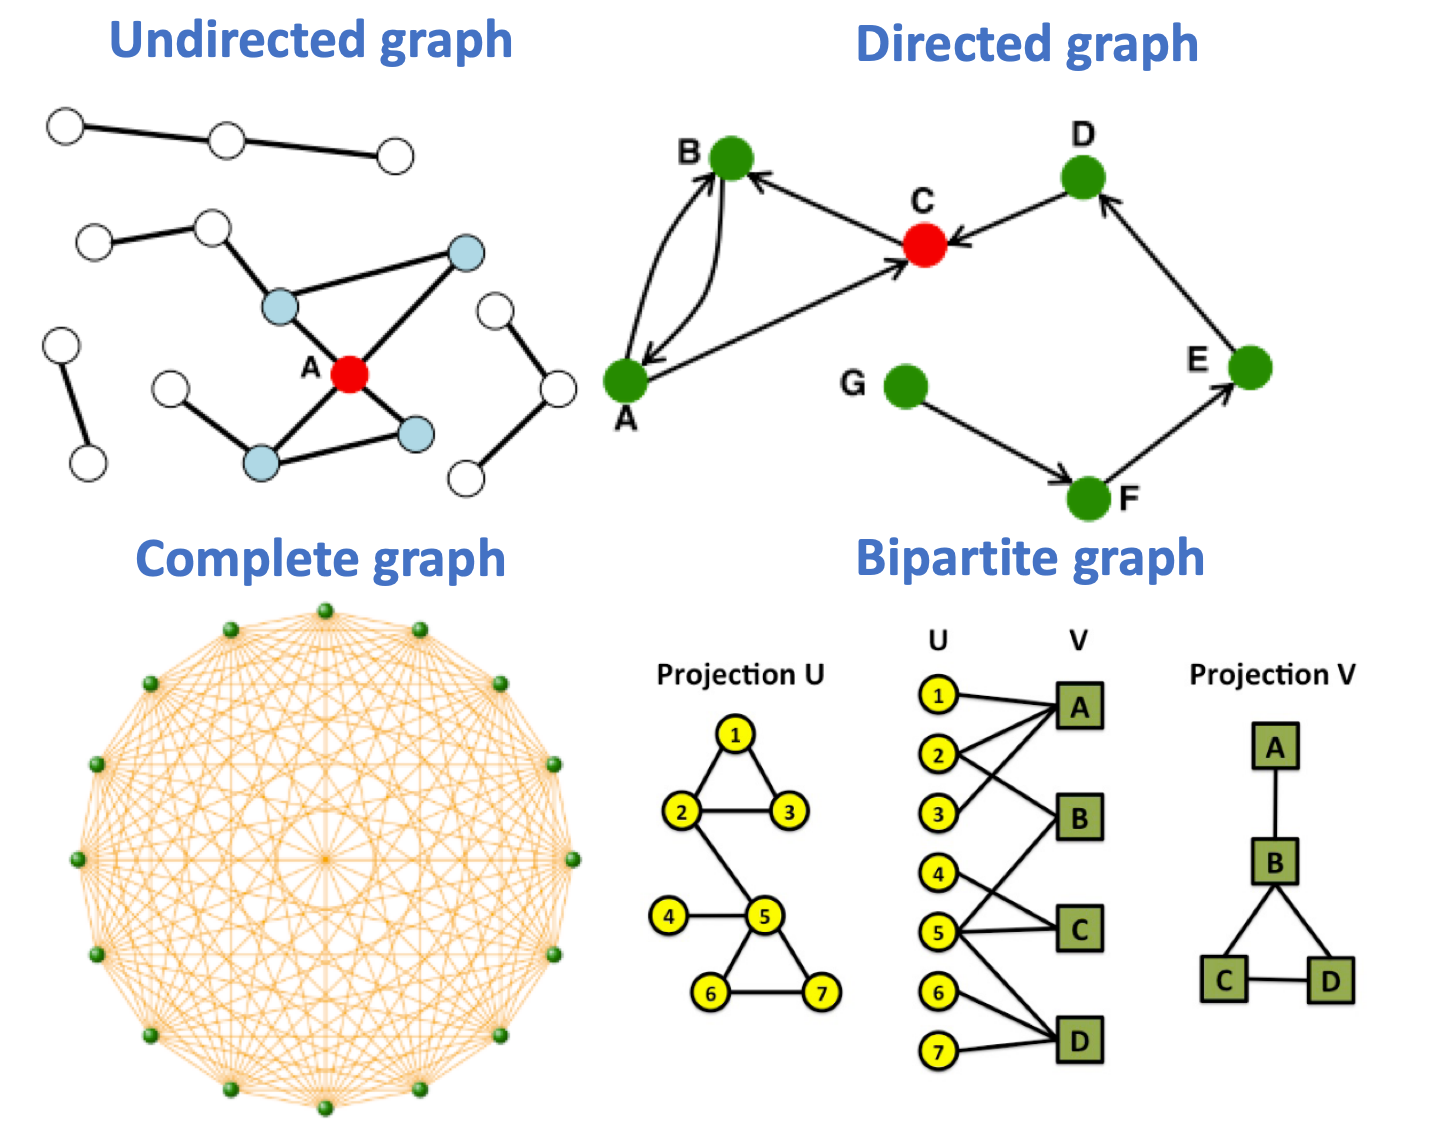

**Другие типы графов** кратко отметим, что графы могут также включать самопересечения (самопетли), веса, связанные с ребрами, и множество ребер, соединяющих узлы. Эти атрибуты могут быть легко закодированы в представлении графа.


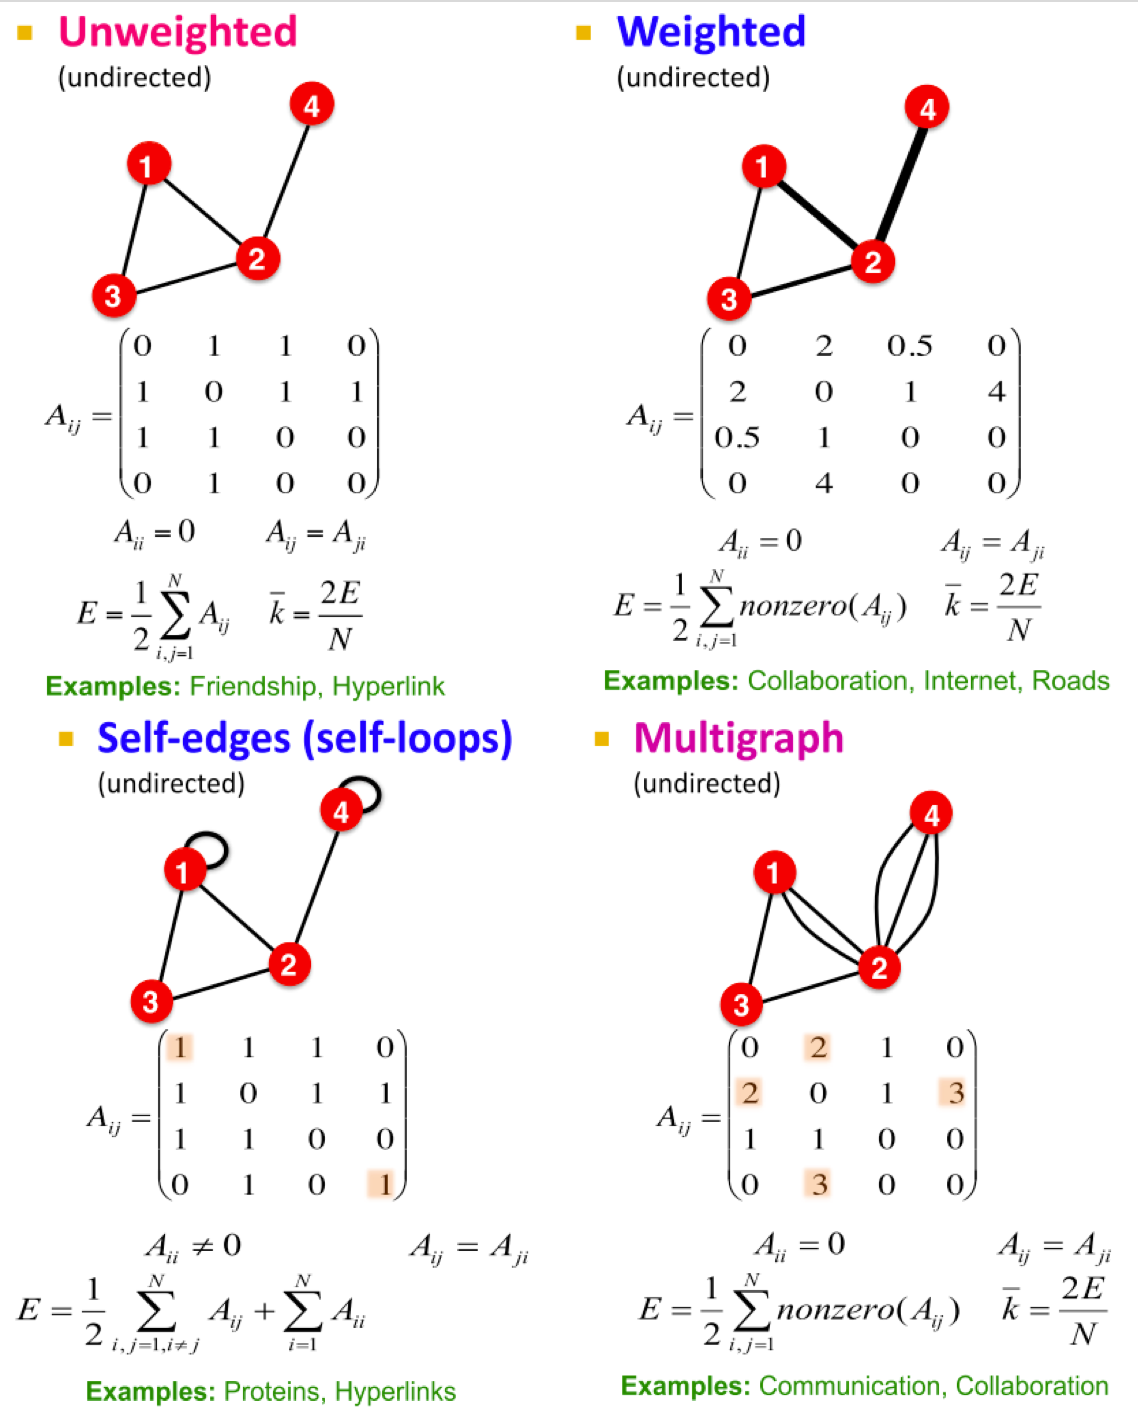

### Представление графов

Существует 3 способа представления графа $G$:
- **Матрица смежности**: это один из самых распространенных способов представления матрицы. На изображении ниже показана вся информация о направленном и ненаправленном графе. Обратите внимание, что матрица смежности симметрична для неориентированного графа и асимметрична для направленного графа. Однако большинство реальных сетей являются разреженными ($|E| \ll E_{\max}$ или $\bar{k} \ll |N|-1$). Как следствие, матрица смежности заполняется нулями, что является нежелательным свойством!

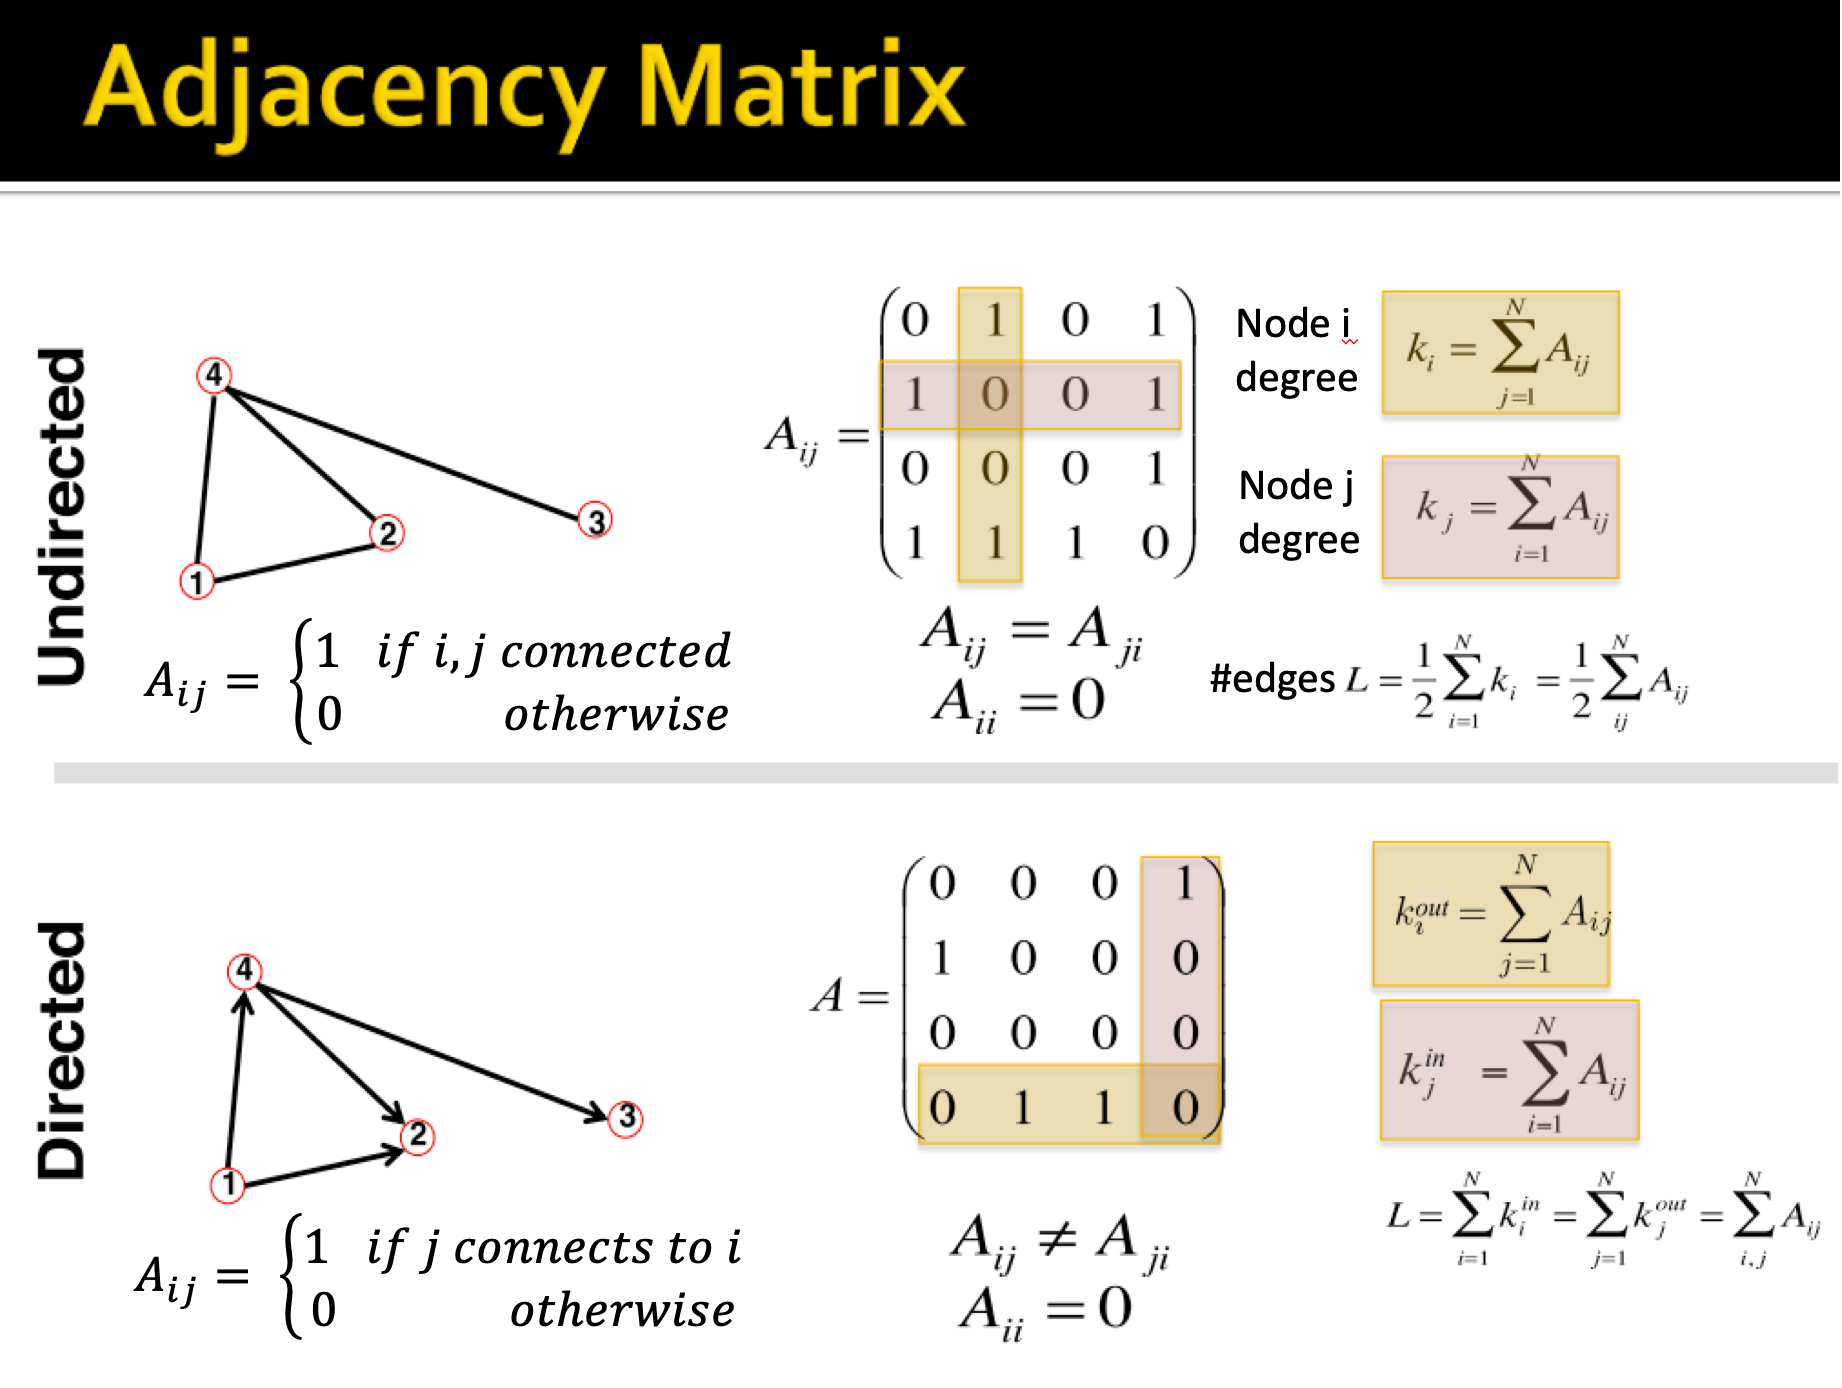

- **Список ребер**: граф может быть представлен в виде набора ребер (список ребер). Примером списка ребер может служить направленный граф [(1,4), (4,2), (4,3), (1,2)]. Такое представление усложняет поиск ребер, но сохраняет память (облегчает ситуацию упомянутая выше матрица смежности).

- **Список смежности**: С этим методом легче работать, если сеть большая и разреженная. Он также позволяет быстро получить все соседние узлы данного узла. Пример списка смежности для направленного графа {1:[4,2], 2:[], 3:[], 4:[2,3]}.

### Связность графа

Неориентированный граф называется **связным**, если между любой парой узлов графа существует путь.
Граф называется **разъединенным**, если он состоит из двух или более связанных компонентов.

На рисунке ниже показаны основные понятия о связности, характерные для неориентированного графа, такие как **связный(неориентированный) граф**, **разъединенный(неориентированный) граф**, **гигантская компонента**, **изолированный узел**, **мостовое ребро**, **артикулированный узел**. Кроме того, матрица смежности таких сетей может быть представлена в блочно-диагональной форме.

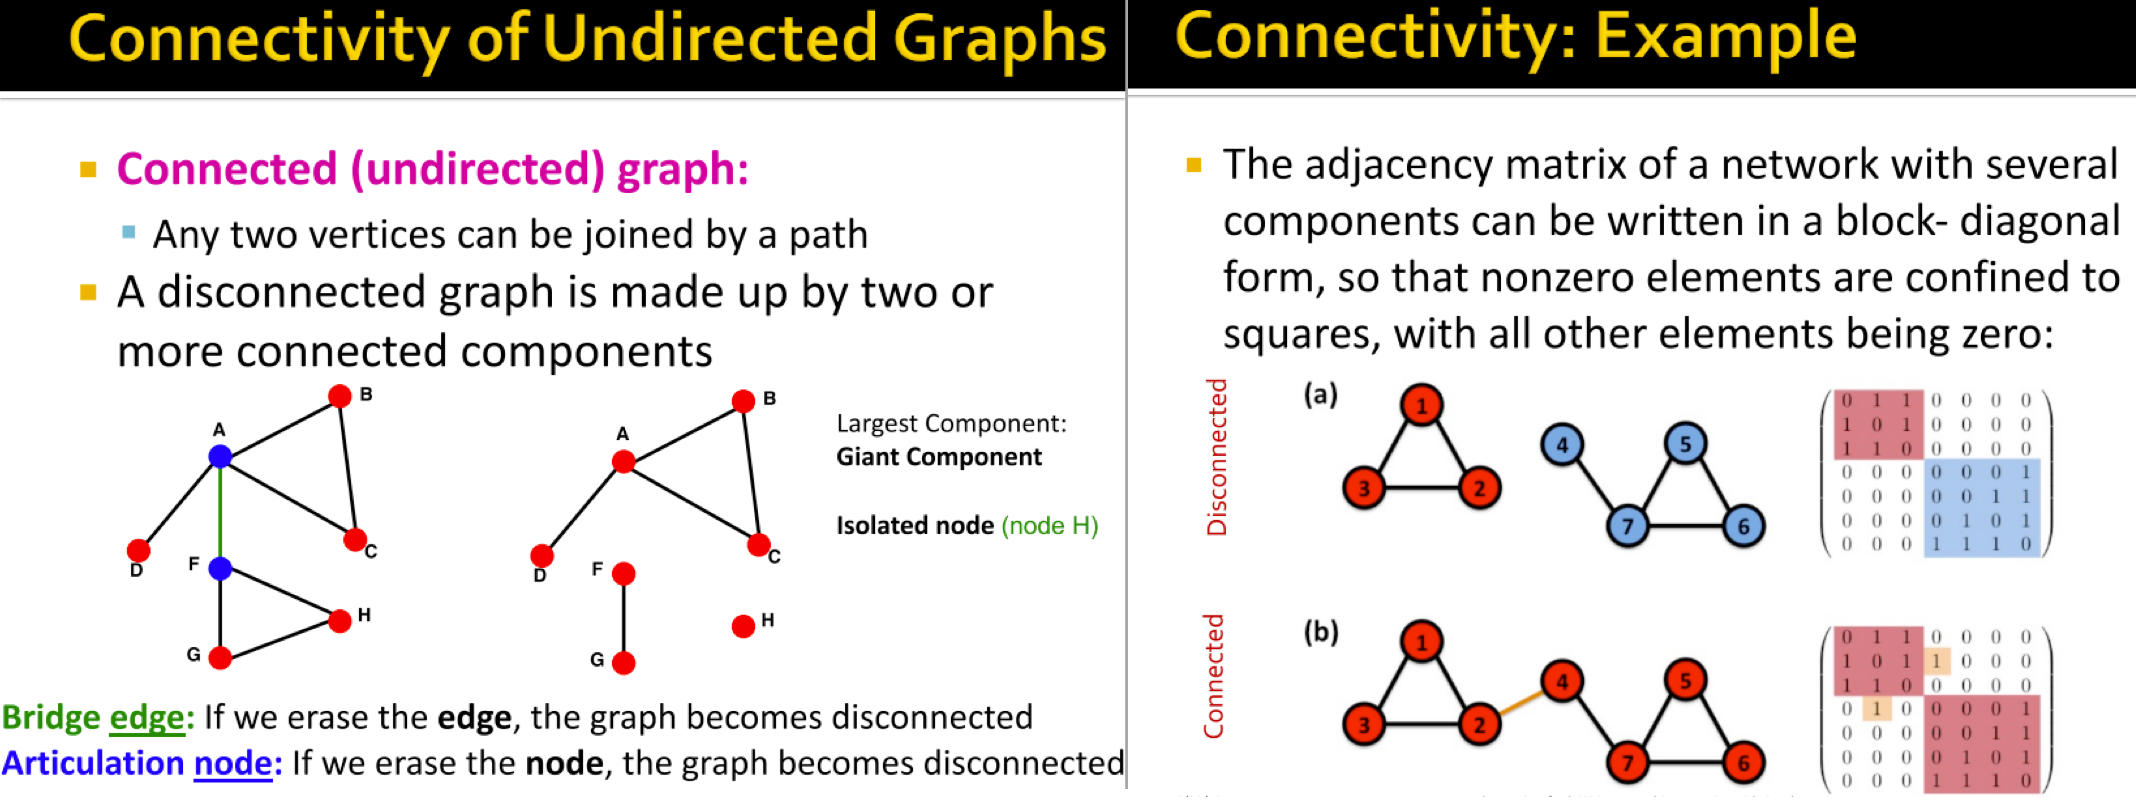

Мы можем далее расширить понятия связности от неориентированных к направленным графам, определив **сильно связный направленный граф**, **слабо связный направленный граф**, **сильно связные компоненты**.
>Примечание: сильно связные компоненты (SCC) могут быть определены как сильно связные подграфы большего графа.

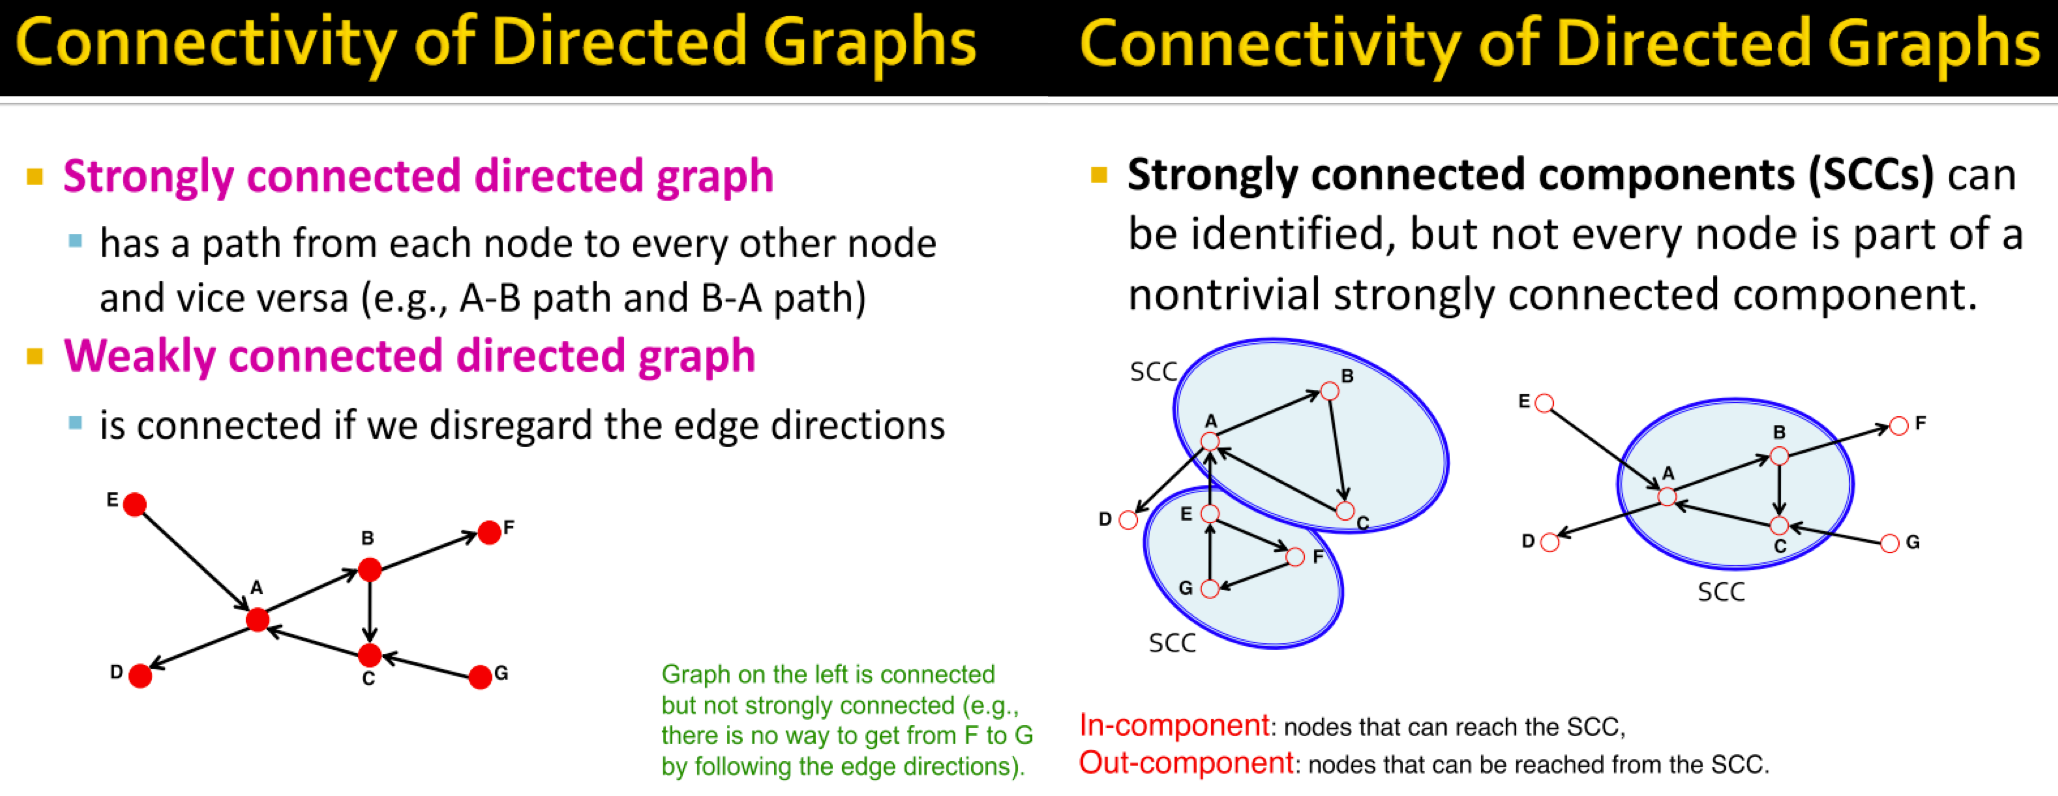

В целом, то, как мы определяем сеть, как мы выбираем правильное сетевое представление данной области/проблемы, определяет нашу способность успешно использовать сеть. В некоторых случаях существует уникальное, однозначное представление, но в других случаях представление отнюдь не уникально. То, как мы назначаем связи, также определяет характер вопроса, который мы можем изучать. Вот некоторые примеры представлений сетей:
- Сеть электронной почты: может быть представлена в виде направленного мультиграфа с графами самопересечений.
- Дружеские связи в Facebook: могут быть представлены в виде неориентированных невзвешенных графов.
- Сети цитирования: могут быть представлены в виде невзвешенных, направленных, ациклических графов.
- Сети сотрудничества: могут быть представлены в виде неориентированных мультиграфов или взвешенных графов.
- Звонки по мобильному телефону: могут быть представлены в виде направленного (взвешенного?) мультиграфа.
- Белковые взаимодействия: могут быть представлены в виде неориентированных, невзвешенных графов с самовзаимодействием.

# NetworkX

NetworkX - один из наиболее часто используемых пакетов Python для создания и использования графов.

## Установка

In [ ]:
# Импортируем пакет NetworkX
import networkx as nx

## Граф
NetworkX предоставляет несколько классов для хранения различных типов графов, таких как направленные и неориентированные графы. Он также предоставляет классы для создания мультиграфов (как направленных, так и неориентированных).

Более подробную информацию можно найти в разделе [Типы графов NetworkX](https://networkx.org/documentation/stable/reference/classes/index.html).

In [ ]:
# Create an undirected graph G
G = nx.Graph()
print(G.is_directed())

# Create a directed graph H
H = nx.DiGraph()
print(H.is_directed())

# Add graph level attribute
G.graph["Name"] = "Bar"
print(G.graph)

## Узлы

Узлы (с атрибутами) можно добавить к графам NetworkX.

In [ ]:
# Add one node with node level attributes
G.add_node(0, feature=0, label=0)

# Get attributes of the node 0
node_0_attr = G.nodes[0]
print("Node 0 has the attributes {}".format(node_0_attr))

In [ ]:
# Add multiple nodes with attributes
G.add_nodes_from([
  (1, {"feature": 1, "label": 1}),
  (2, {"feature": 2, "label": 2})
])

# Loop through all the nodes
# Set data=True will return node attributes
for node in G.nodes(data=True):
  print(node)

# Get number of nodes
num_nodes = G.number_of_nodes()
print("G has {} nodes".format(num_nodes))

## Ребра

Подобно узлам, ребра (с атрибутами) также могут быть легко добавлены в графы NetworkX.

In [ ]:
# Add one edge with edge weight 0.5
G.add_edge(0, 1, weight=0.5)

# Get attributes of the edge (0, 1)
edge_0_1_attr = G.edges[(0, 1)]
print("Edge (0, 1) has the attributes {}".format(edge_0_1_attr))

In [ ]:
# Add multiple edges with edge weights
G.add_edges_from([
  (1, 2, {"weight": 0.3}),
  (2, 0, {"weight": 0.1})
])

# Loop through all the edges
# Here there is no data=True, so only the edge will be returned
for edge in G.edges():
  print(edge)

# Get number of edges
num_edges = G.number_of_edges()
print("G has {} edges".format(num_edges))

## Визуализация

In [ ]:
# Draw the graph
nx.draw(G, with_labels = True)

## Степень узлов и соседние узлы

In [ ]:
node_id = 1

# Degree of node 1
print("Node {} has degree {}".format(node_id, G.degree[node_id]))

# Get neighbor of node 1
for neighbor in G.neighbors(node_id):
  print("Node {} has neighbor {}".format(node_id, neighbor))

## Прочие возможности

NetworkX также предоставляет множество полезных методов для изучения графов.

Вот пример получения [PageRank](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html#networkx.algorithms.link_analysis.pagerank_alg.pagerank) узлов.

In [ ]:
num_nodes = 4
# Create a new path like graph and change it to a directed graph
G = nx.DiGraph(nx.path_graph(num_nodes))
nx.draw(G, with_labels = True)

# Get the PageRank
pr = nx.pagerank(G, alpha=0.8)
pr

## Документация

Вы можете изучить больше функций NetworkX в его [документации](https://networkx.org/documentation/stable/).

# PyTorch Geometric

PyTorch Geometric (PyG) - это библиотека расширения для PyTorch. Она предоставляет полезные примитивы для разработки моделей Graph Deep Learning, включая различные слои графовых нейронных сетей и большое количество наборов данных.

Материалы взяты из https://colab.research.google.com/drive/1h3-vJGRVloF5zStxL5I0rSy4ZUPNsjy8?usp=sharing#scrollTo=ci-LpZWhRJoI, созданного [Matthias Fey](https://rusty1s.github.io/#/).


In [ ]:
import torch
print("PyTorch has version {}".format(torch.__version__))

## Установка

См. также [PyG's installation page](https://pytorch-geometric.readthedocs.io/en/latest/notes/installation.html).

In [ ]:
# # Install torch geometric
# !pip install torch-scatter torch-sparse -f https://data.pyg.org/whl/torch-{torch.__version__}.html
# !pip install pyg_lib torch_scatter torch_sparse torch_cluster \
# torch_spline_conv -f https://data.pyg.org/whl/torch-2.0.1+cu118.html
# !pip install -q torch-geometric


import torch

!pip uninstall torch-scatter torch-sparse torch-geometric torch-cluster  --y
!pip install torch-scatter -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install git+https://github.com/pyg-team/pytorch_geometric.git
!pip install -q torch-geometric

## Визуализация

In [ ]:
# Helper function for visualization.
%matplotlib inline
import torch
import networkx as nx
import matplotlib.pyplot as plt

# Visualization function for NX graph or PyTorch tensor
def visualize(h, color, epoch=None, loss=None):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])

    if torch.is_tensor(h):
        h = h.detach().cpu().numpy()
        plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
        if epoch is not None and loss is not None:
            plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
    else:
        nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                         node_color=color, cmap="Set2")
    plt.show()

## Введение

В последнее время глубокое обучение на графах стало одним из самых горячих направлений исследований в сообществе глубокого обучения.
Здесь **Графовые нейронные сети (GNN)** нацелены на обобщение классических концепций глубокого обучения на нерегулярные структурированные данные (в отличие от изображений или текстов) и на то, чтобы нейронные сети могли рассуждать об объектах и их отношениях.

Этот учебник познакомит вас с некоторыми фундаментальными концепциями глубокого обучения на графах с помощью графовых нейронных сетей на основе **[библиотеки PyTorch Geometric (PyG)](https://github.com/rusty1s/pytorch_geometric)**.
PyTorch Geometric - это библиотека расширения популярного фреймворка глубокого обучения [PyTorch](https://pytorch.org/), состоящая из различных методов и утилит для облегчения реализации графовых нейронных сетей.

Следуя [Kipf et al. (2017)](https://arxiv.org/abs/1609.02907), давайте погрузимся в мир GNN, рассмотрев простой граф-структурированный пример - хорошо известную сеть [**Zachary's karate club network**](https://en.wikipedia.org/wiki/Zachary%27s_karate_club). Этот граф описывает социальную сеть из 34 членов клуба карате и документирует связи между членами, которые взаимодействовали за пределами клуба. Здесь мы заинтересованы в обнаружении сообществ, возникающих в результате взаимодействия членов клуба.

## Набор данных

PyTorch Geometric предоставляет легкий доступ к набору данных через [`torch_geometric.datasets`](https://pytorch-geometric.readthedocs.io/en/latest/modules/datasets.html#torch_geometric.datasets):

In [ ]:
from torch_geometric.datasets import KarateClub

dataset = KarateClub()
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

После инициализации набора данных [`KarateClub`](https://pytorch-geometric.readthedocs.io/en/latest/modules/datasets.html#torch_geometric.datasets.KarateClub) мы можем проверить некоторые его свойства.
Например, мы видим, что этот набор данных содержит ровно **один граф**, и что каждому узлу в этом наборе данных присвоен **34-мерный вектор признаков** (который уникально описывает членов клуба карате).
Кроме того, граф содержит ровно **4 класса**, которые представляют сообщество, к которому принадлежит каждый узел.

Давайте теперь рассмотрим граф более подробно:

In [ ]:
data = dataset[0]  # Get the first graph object.

print(data)
print('==============================================================')

# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Contains isolated nodes: {data.has_isolated_nodes()}')
print(f'Contains self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

## Объекты данных

Каждый граф в PyTorch Geometric представлен одним объектом [`Data`](https://pytorch-geometric.readthedocs.io/en/latest/modules/data.html#torch_geometric.data.Data), который содержит всю информацию для описания представления графа.
Мы можем распечатать объект данных в любое время через `print(data)`, чтобы получить краткую информацию о его атрибутах и их формах:
```
Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])
```
Мы видим, что этот объект `data` содержит 4 атрибута:
(1) Свойство `edge_index` содержит информацию о **связности графа**, *т.е.*, кортеж индексов исходного и конечного узлов для каждого ребра.
Далее PyG называет (2) **особенности узлов** `x` (каждому из 34 узлов присваивается 34-мерный вектор признаков), а (3) **метки узлов** `y` (каждому узлу присваивается ровно один класс).
(4) Существует также дополнительный атрибут `train_mask`, который описывает, для каких узлов нам уже известны назначения сообществ.
В целом, нам известны истинные метки только 4 узлов (по одной для каждого сообщества), и задача состоит в том, чтобы вывести назначение сообществ для остальных узлов.

Объект `data` также предоставляет некоторые **полезные функции** для вывода некоторых основных свойств базового графа.
Например, мы можем легко определить, существуют ли в графе изолированные узлы (*т.е.* не существует ребра ни к одному узлу), содержит ли граф самопетли (*т.е.*, $(v, v) \in \mathcal{E}$), или является ли граф ненаправленным (*т.е.*, для каждого ребра $(v, w) \in \mathcal{E}$ также существует ребро $(w, v) \in \mathcal{E}$).

In [ ]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

edge_index = data.edge_index
print(edge_index.t())

## Индекс по рёбрам

Распечатав `edge_index`, мы можем понять, как PyG представляет внутреннюю связность графа.
Мы видим, что для каждого ребра `edge_index` содержит кортеж из двух индексов узлов, где первое значение описывает индекс узла-источника, а второе - индекс узла назначения ребра.

Это представление известно как формат **COO (формат координат)**, обычно используемый для представления разреженных матриц.
Вместо того, чтобы хранить информацию о смежности в плотном представлении $\mathbf{A} \in \{ 0, 1 \}^{|\mathcal{V}| \times |\mathcal{V}|}$, PyG представляет графы разреженно, что означает хранение только тех координат/значений, для которых записи в $\mathbf{A}$ ненулевые.

Мы можем дополнительно визуализировать граф, преобразовав его в формат библиотеки `networkx`, которая реализует, помимо функций манипулирования графами, мощные инструменты для визуализации:

In [ ]:
from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=True)
visualize(G, color=data.y)

## Реализация графовых нейронных сетей

После знакомства с обработкой данных в PyG пришло время реализовать нашу первую графовую нейронную сеть!

Для этого мы будем использовать один из самых простых операторов GNN, слой **GCN** ([Kipf et al. (2017)](https://arxiv.org/abs/1609.02907)).

PyG реализует этот слой через [`GCNConv`](https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#torch_geometric.nn.conv.GCNConv), который можно выполнить, передав представление признака узла `x` и координатное представление связности графа `edge_index`.

Таким образом, мы готовы создать нашу первую графовую нейронную сеть, определив архитектуру сети в классе `torch.nn.Module`:

In [ ]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv


class GCN(torch.nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        torch.manual_seed(12345)
        self.conv1 = GCNConv(dataset.num_features, 4)
        self.conv2 = GCNConv(4, 4)
        self.conv3 = GCNConv(4, 2)
        self.classifier = Linear(2, dataset.num_classes)

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.tanh()
        h = self.conv2(h, edge_index)
        h = h.tanh()
        h = self.conv3(h, edge_index)
        h = h.tanh()  # Final GNN embedding space.

        # Apply a final (linear) classifier.
        out = self.classifier(h)

        return out, h

model = GCN()
print(model)

Здесь мы сначала инициализируем все наши строительные блоки в `__init__` и определяем поток вычислений нашей сети в `forward`.
Сначала мы определяем и укладываем **три слоя свертки графа**, что соответствует агрегированию информации о 3-прыжковом соседстве вокруг каждого узла (все узлы на расстоянии до 3 прыжков ("хопов")).
Кроме того, слои `GCNConv` уменьшают размерность характеристик узла до $2$, т.е., $34 \rightarrow 4 \rightarrow 4 \rightarrow 4 \rightarrow 2$. Каждый слой `GCNConv` усиливается нелинейностью [tanh](https://pytorch.org/docs/stable/generated/torch.nn.Tanh.html?highlight=tanh#torch.nn.Tanh).

После этого мы применяем одно линейное преобразование ([`torch.nn.Linear`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html?highlight=linear#torch.nn.Linear)), которое действует как классификатор для отнесения наших узлов к 1 из 4 классов/сообществ.

Мы возвращаем как вывод конечного классификатора, так и конечные вкрапления узлов, созданные нашей GNN.
Мы инициализируем нашу конечную модель с помощью `GCN()`, а печать нашей модели выводит сводку всех использованных подмодулей.

In [ ]:
model = GCN()

_, h = model(data.x, data.edge_index)
print(f'Embedding shape: {list(h.shape)}')

visualize(h, color=data.y)

Примечательно, что даже до обучения весов нашей модели, модель производит вложение узлов, которое близко напоминает структуру сообщества графа.
Узлы одного цвета (сообщества) уже тесно сгруппированы вместе в пространстве вложения, хотя веса нашей модели инициализируются **полностью случайным образом** и мы еще не проводили никакого обучения!
Это позволяет сделать вывод, что GNN вносят сильное индуктивное предубеждение, приводящее к схожим вкраплениям для узлов, которые находятся близко друг к другу во входном графе.

### Обучение на сети клуба карате

Но можем ли мы добиться большего? Давайте рассмотрим пример обучения параметров нашей сети на основе знаний о вложениях сообществ 4 узлов графа (по одному для каждого сообщества):

Поскольку все в нашей модели дифференцируемо и параметризовано, мы можем добавить несколько меток, обучить модель и наблюдать за реакцией вкраплений.
Здесь мы используем полусупервизорную или трансдуктивную процедуру обучения: Мы просто обучаемся на одном узле для каждого класса, но нам разрешено использовать все входные данные графа.

Обучение нашей модели очень похоже на обучение любой другой модели PyTorch.
Помимо определения архитектуры сети, мы определяем критерий потерь (здесь [`CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html)) и инициализируем стохастический оптимизатор градиента (здесь [`Adam`](https://pytorch.org/docs/stable/optim.html?highlight=adam#torch.optim.Adam)).
После этого мы выполняем несколько раундов оптимизации, где каждый раунд состоит из прямого и обратного прохода для вычисления градиентов параметров нашей модели по отношению к потерям, полученным в результате прямого прохода.
Если вы не новичок в PyTorch, эта схема должна показаться вам знакомой.
В противном случае, в документации по PyTorch есть [хорошее введение о том, как обучить нейронную сеть в PyTorch] (https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#define-a-loss-function-and-optimizer).

Обратите внимание, что наш сценарий полунаблюдаемого обучения достигается следующей строкой:
```
loss = criterion(out[data.train_mask], data.y[data.train_mask])
```
Хотя мы вычисляем вкрапления узлов для всех наших узлов, мы **используем только обучающие узлы для вычисления потерь**.
Здесь это реализовано путем фильтрации вывода классификатора `out` и меток "ground-truth" `data.y`, чтобы содержать только узлы в `train_mask`.

Давайте теперь начнем обучение и посмотрим, как наши вкрапления узлов изменяются со временем (лучше всего это видно при явном выполнении кода):

In [ ]:
import time
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 430})'''))

model = GCN()
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Define optimizer.

def train(data):
    optimizer.zero_grad()  # Clear gradients.
    out, h = model(data.x, data.edge_index)  # Perform a single forward pass.
    loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss, h

for epoch in range(401):
    loss, h = train(data)
    # Visualize the node embeddings every 10 epochs
    if epoch % 10 == 0:
        visualize(h, color=data.y, epoch=epoch, loss=loss)
        time.sleep(0.3)

Как видно, наша трехслойная GCN-модель справляется с линейным разделением сообществ и правильно классифицирует большинство узлов.

Более того, мы сделали все это с помощью нескольких строк кода, благодаря библиотеке PyTorch Geometric, которая помогла нам с обработкой данных и реализацией GNN.

## Документация



Вы можете узнать больше функций PyG в его [документации](https://pytorch-geometric.readthedocs.io/en/latest/).